## Introduction
<b>Naive Bayes</b> is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. The technique behind Naive Bayes is easy to understand. Naive Bayes has higher accuracy and speed when we have large data points.

There are three types of Naive Bayes models: <u>Gaussian</u>, <u>Multinomial</u>, and <u>Bernoulli</u>.

- <b>Gaussian Naive Bayes</b> - This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

- <b>Multinomial Naive Bayes</b> - This is another variant which is an event-based model that has features as vectors where sample(feature) represents frequencies with which certain events have occurred.

- <b>Bernoulli</b> - This variant is also event-based where features are independent boolean which are in binary form.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
        
data = pd.read_csv('C:\\Users\\Adrij\\Documents\\Data Analysis and Machine Learning\\ds2_train.csv')
testdata=pd.read_csv('C:\\Users\\Adrij\\Documents\\Data Analysis and Machine Learning\\ds2_test.csv')

data.head(4)

,x_1,x_2,y
0,3.759481,7.507940,0.0
1,3.422057,4.991203,0.0
2,2.778818,4.112071,0.0
3,4.018066,5.653732,0.0


We will use a Gaussian model to detect anomalous examples in our dataset. 
* We will apply the anomaly detection algorithm to a larger dataset with many dimensions. 

The formula which will be applied will be :
![Gaussian Naive Bayes Formula](https://iq.opengenus.org/content/images/2020/02/Screenshot_6.jpg)

###  Dataset

We will start by loading the dataset for this task. 
- The `data()` and `testdata()` function shown below loads the data into the variables `X_train`, `X_test` , `y_train` and `y_test` 
    - We will use `X_train` and `y_train` to fit a Gaussian distribution 
    - We will use `X_test` and `y_test` as a cross validation set to select a threshold and determine anomalous vs normal examples
    
## Evaluate Model Performance

Almost all models in `Scikit-Learn API provide predict()` method which can be used to predict target values on Test Set passed to it.

In [2]:
# dividing X, y into train and test data
X_train, x_test, y_train, Y_test = train_test_split(data[['x_1','x_2']],data['y'],random_state = 0)
X_test, x_train, y_test, Y_train=train_test_split(testdata[['x_1','x_2']],testdata['y'],random_state = 0)
  
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
accuracy 

0.88

In [3]:
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[33,  4],
       [ 5, 33]], dtype=int64)

In [4]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

# Now we are ready to define the perceptron; 
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

In [5]:
features = data[['x_1', 'x_2']].to_numpy()
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features))

Output with sigmoid activator:  0.8536170737463635
Output with ReLU activator:  0.880961120893531


In [6]:
import numpy as np

# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

In [7]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

labels = data['y'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.01)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 792
Test records: 8


In [8]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/792


# 0: Random initialize the relevant data 
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train[I]
    
    
    # 2: Start the algorithm
    
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    #2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    # 3: Gradient descent 
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


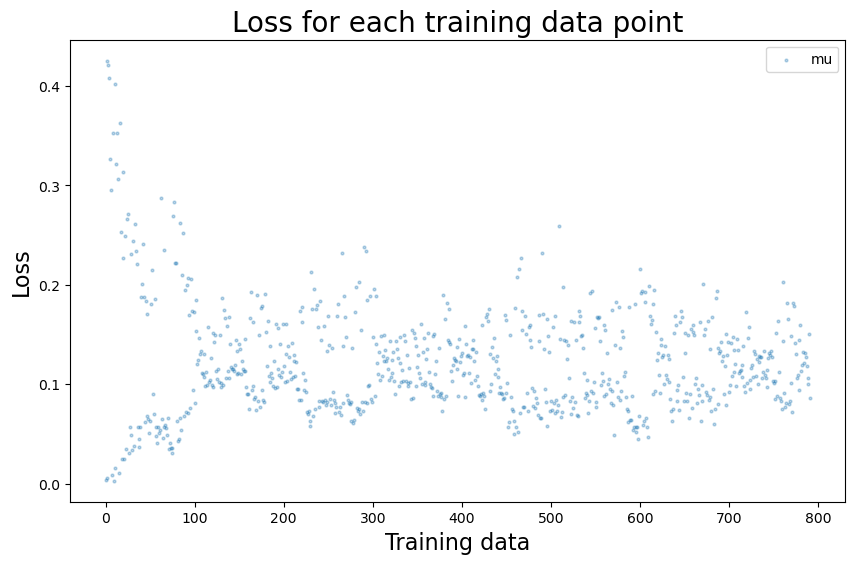

In [9]:
# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend()
plt.show()

# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)

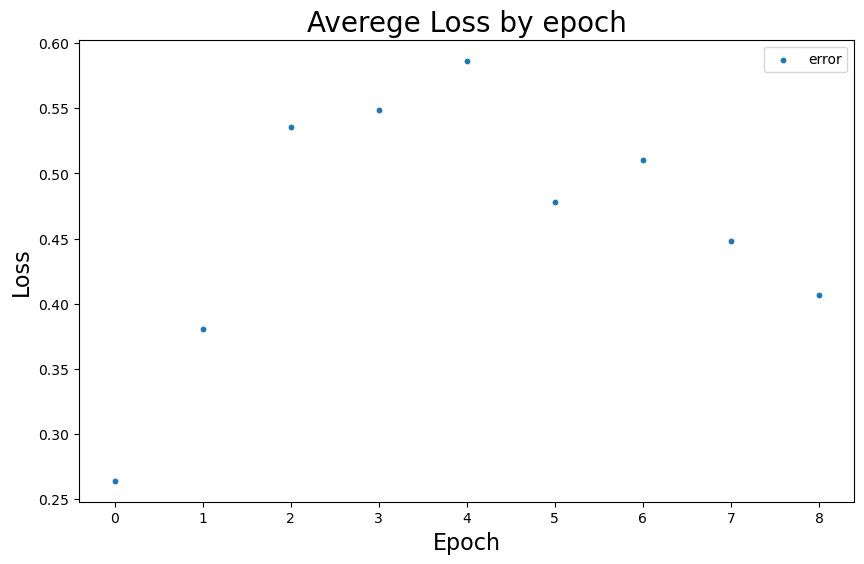

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend()
plt.show()

In [11]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.
    
    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
    
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, wOut, bOut, mu

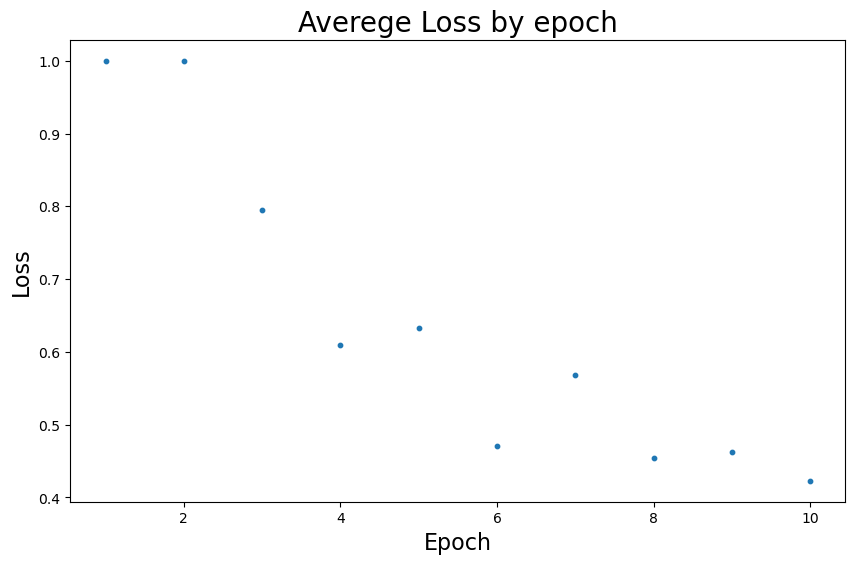

In [12]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=8, q=4, eta=0.0015)

In [13]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

In [14]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)
predictions

array([1., 1., 1., 0., 1., 1., 1., 1.])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

<b>CategoricalNB</b> implements the <u>categorical naive Bayes algorithm</u> for categorically distributed data. It assumes that each feature, which is described by the index, has its own categorical distribution.

For each feature $i$ in the training set $X$ , <b>CategoricalNB</b>  estimates a categorical distribution for each feature $i$ of $X$ conditioned on the class $y$. The index set of the samples is defined as,$ J={\{1,...,m\}} $ with as the number of samples.

The probability of category in feature given class is estimated as:

$  P (x _\mathbf{i} = t | y = c; \alpha) $= $ $$\LARGE\frac{N _\mathbf{tic}+ \alpha}{N _\mathbf{c}+ \alpha n _\mathbf{i}} $

where $ N _\mathbf{tic} = |\{ j \in J | x _\mathbf{ij} =t, y _\mathbf{j} = c\} |  $ is the number of $t$ times category appears in the samples $ x _\mathbf{i}$, which belong to class $ c $,$ N _\mathbf{c} =|\{ j \in J | y _\mathbf{j} = c \} | $ is the number of samples with class c,$ \alpha $ is a smoothing parameter and $ n _\mathbf{i}$ is the number of available categories of feature $i$.

<b>CategoricalNB</b> assumes that the sample matrix $X$ is encoded (for instance with the help of `OrdinalEncoder`) such that all categories for each feature $i$ are represented with numbers $ 0,...,$$ n _\mathbf{i}$$-1$ where $n _\mathbf{i}$ is the number of available categories of feature $i$.

<b>MultinomialNB</b> implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors $ \theta _\mathbf{y} = (\theta _\mathbf{y1},....,\theta _\mathbf{yn})$for each class $y$ , where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta _\mathbf{y1} $ is the probability $P(x _\mathbf{i} \mid y)$ of feature $i$ appearing in a sample $y$ belonging to class $y$.

The parameters $\theta _\mathbf{y} $ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$ \hat{\theta _\mathbf{yi}}$= $ $$ \LARGE\frac{N _\mathbf{yi}+ \alpha}{N _\mathbf{y}+ \alpha n} $ 

where  $ N _\mathbf{yi} = \sum_{x \in T} x _\mathbf{i}$ is the number of times feature $i$ appears in a sample of class $y$ in the training set T, and $N _\mathbf{y}=\sum_{i=1}^{n} N _\mathbf{yi}$ is the total count of all features for class $y$.

The smoothing priors $\alpha \ge 0 $ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $ \alpha = 1$ is called Laplace smoothing, while $ \alpha < 0$ is called Lidstone smoothing.

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)
import numpy as np
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

ValueError: Found input variables with inconsistent numbers of samples: [792, 600]

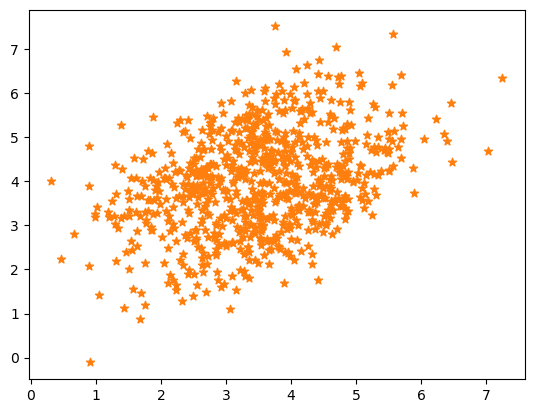

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], X_train[:,1], c='C1', marker="*", label='Training data')

ValueError: x and y must be the same size

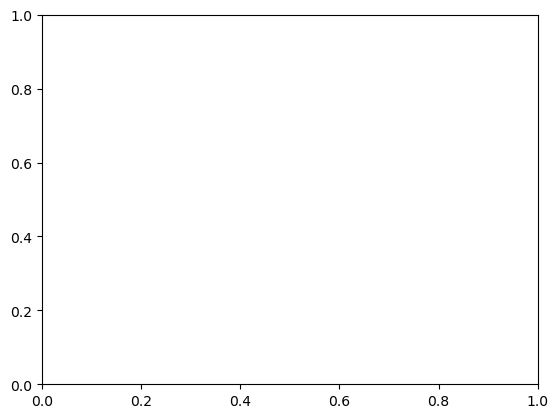

In [19]:
plt.scatter(X_train[:,0], y_train, c='C1', marker="*", label='Training data')

ValueError: x and y must be the same size

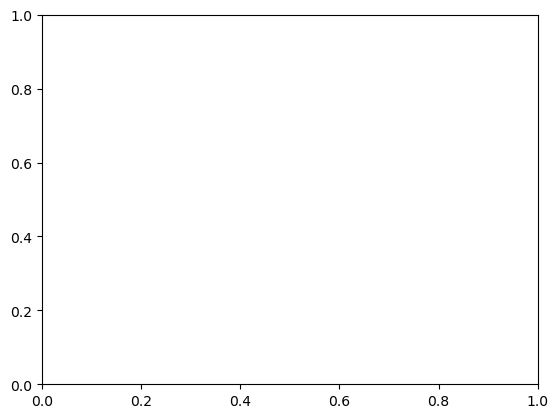

In [20]:
plt.scatter(X_train[:,1], y_train, c='C1', marker="*", label='Training data')

Our model has performed fairly well with default hyperparameters. 

In [21]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

NameError: name 'model' is not defined

To visualize the Confusion matrix, we will use `confusion_matrix` to calculate the true positives and true negatives and `ConfusionMatrixDisplay` to display the confusion matrix with the labels.

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Our model has performed quite well, and we can improve model performance by scaling, preprocessing cross-validations, and hyperparameter optimization. 

In [ ]:
import numpy as np 
import pandas as pd
#Sklearn Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
GaussianNB()
#Accuracy
print("Naive Bayes score: ",nb.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [ ]:
def univariateAnalysis_numeric1(column,nbins):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')

    print("\nCentral values of " + column)
    print("----------------------------------------------------------------------------")
    #Central values 
    print('\nMinimum : ', data[column].min(),end=' ')
    print('\nMaximum : ', data[column].max(),end=' ')
    print('\nMean value : ', data[column].mean(),end=' ')
    print('\nMedian value : ', data[column].median(),end=' ')
    print('\nStandard deviation : ', data[column].std(),end=' ')
    print('\nNull values : ', data[column].isnull().any(),end=' ')
    print('\nNull values : ', data[column].isnull().sum().sum(),end=' ')

    print("\nQuartile of " + column)
    #Quartiles
    Q1=data[column].quantile(q=0.25)
    Q3=data[column].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(data[column]))

    print("\nOutlier detection from Interquartile range (IQR) " + column)
    print("----------------------------------------------------------------------------")
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('\nLower outliers range: ', L_outliers)
    print('\nUpper outliers range: ', U_outliers)
    print('Number of outliers in upper : ', data[data[column]>U_outliers][column].count())
    print('Number of outliers in lower : ', data[data[column]<L_outliers][column].count())
    print('% of Outlier in upper: ',round(data[data[column]>U_outliers][column].count()*100/len(data)), '%')
    print('% of Outlier in lower: ',round(data[data[column]<L_outliers][column].count()*100/len(data)), '%')
    #boxplot
    plt.figure()
    print("\nBoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()
    
    #distplot
    plt.figure()
    print("\ndistplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data[column])
    plt.show()
    
    #histogram
    plt.figure()
    print("\nHistogram of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data[column], kde=False, color='red')
    plt.show()
    # Plotting mean, median and mode
    plt.figure()
    print("\nHistogram with mean, median and mode of " + column)
    print("----------------------------------------------------------------------------")
    mean=data[column].mean()
    median=data[column].median()
    mode=data[column].mode()

    print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
    plt.hist(data[column],bins=100,color='lightblue') #Plot the histogram
    plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode[0],color='red',label='Mode1')
    plt.legend()              # Plot the legend
    plt.show()
    print("\nSkewness of " + column)
    print("----------------------------------------------------------------------------")

    print(data[column].skew())
 
    fig ,(ax1)=plt.subplots(1,1, figsize=(25, 15))

In [ ]:
# Input data files are available in the "../input/" directory.
        
data = pd.read_csv('C:\\Users\\Adrij\\Documents\\Data Analysis and Machine Learning\\ds2_train.csv')
testdata=pd.read_csv('C:\\Users\\Adrij\\Documents\\Data Analysis and Machine Learning\\ds2_test.csv')

df_num = data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)


In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric1(x,20)

In [ ]:
sns.pairplot(data,diag_kind='kde',kind='reg')

In [ ]:
#correlation matrix
data.corr().T

In [ ]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

<h2>Correlations</h2>
Correlation reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, we can remove them.

In [ ]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = data.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

In [ ]:
model = GaussianNB()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')
cv_scores1 = cross_val_score(model, X_test, y_test, cv=5)
print(model, ' test accuracy: ', round(cv_scores1.mean()*100, 3), '% std: ', round(cv_scores1.var()*100, 3),'%')

In [ ]:
#Conditional Formatting in pandas - Colouring cells having 0 (zero) values

data.style.applymap(lambda X_train: 'background-color : red' if X_train==0 else '')

In [ ]:
from sklearn.impute import SimpleImputer
X_train= data.drop(columns=['y'],axis=1)
y_train = data['y']
X_test= testdata.drop(columns=['y'],axis=1)
y_test = testdata['y']
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols
data.head()

In [ ]:
from sklearn import metrics
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)


# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predict_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data')

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

## Hyperparameter Tuning to improve Accuracy
`Var_smoothing`<u> (Variance smoothing)</u> parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.

Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform `power transformation` on each feature to make it more or less normally distributed. By default, `PowerTransformer` results in features that have a 0 mean and 1 standard deviation.

In [ ]:
#Hyperparameter tuning to improve accuracy
np.logspace(0,-9, num=10)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

## Hyperparameters Tuning using Grid Search

Below is a list of common hyperparameters that needs tuning for getting best fit for our data. We'll try various hyperparameters settings to various splits of train/test data to find out best fit which will have almost the same accuracy for both train & test datasets or have quite less difference between accuracy.

<span style="color:red">> Parameters to Tune</span>

* <b>alpha</b> - It accepts float values representing the additive smoothing parameter. The value of 0.0 represents no smoothing. The default value of this parameter is `1.0`.
* <b>fit_prior</b> - It accepts boolean value specifying whether to learn prior class probabilities or not.
* <b>class_prior</b> - It accepts arrays of shape <b>(n_classes,)</b> specifying prior probabilities of target classes.
* <b>binarize</b> - It accepts <b>float</b> value specifying threshold for binarizing data features. The default is `None` and features are already considered binarized.

<b>Scikit learn</b> provides a class named `GridSearchCV` that can be used to perform hyperparameters tuning.

`GridSearchCV` is a wrapper class provided by sklearn which loops through all parameters provided as `params_grid parameter` with a number of cross-validation folds provided as `cv` parameter, evaluates model performance on all combinations, and stores all results in `cvresults` attribute. It also stores model which performs best in all cross-validation folds in bestestimator attribute and best score in bestscore attribute.

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

## Evaluate Performance Of Fine Tuned Model

Below, we have calculated accuracy and classification report on predictions made using best estimators we found through grid search. We can notice a slight improvement in model performance.

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)
print("\nClassification Report :")
print(classification_report(y_test, predict_test))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data')